# Information Retrival
## Assignment 2, Group 42
### Question 3
#### Team Members: Harsh Bandhey, Md Talib, Arshdeep Singh

--------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fact(n):
    if n==0 :
        return 1
    else:
        return n*fact(n-1)

def power(a,b):
    return a**b

def cal_dcg(ind_lis,i):
    sum=0
    d=1
    while(d<i+1):
        num=power(2,ind_lis[d-1])-1
        den=np.log2(d+1)
        sum+=num/den
        d=d+1
    return sum

In [3]:
path = "IR-assignment-2-data.txt"
data = pd.read_csv(path, sep=' ', header=None)
data.head()

0      1    2    3    4    5    6    7    8           9    ...     129  \
0    0  qid:4  1:3  2:0  3:2  4:0  5:3  6:1  7:0  8:0.666667  ...   128:2   
1    0  qid:4  1:3  2:0  3:3  4:0  5:3  6:1  7:0         8:1  ...   128:0   
2    0  qid:4  1:3  2:0  3:2  4:0  5:3  6:1  7:0  8:0.666667  ...   128:2   
3    0  qid:4  1:3  2:0  3:3  4:0  5:3  6:1  7:0         8:1  ...  128:82   
4    1  qid:4  1:3  2:0  3:3  4:0  5:3  6:1  7:0         8:1  ...  128:11   

      130      131       132      133      134    135     136        137 138  
0   129:9  130:124  131:4678   132:54   133:74  134:0   135:0      136:0 NaN  
1   129:8  130:122   131:508  132:131  133:136  134:0   135:0      136:0 NaN  
2   129:8  130:115   131:508   132:51   133:70  134:0   135:0      136:0 NaN  
3  129:17  130:122   131:508   132:83  133:107  134:0  135:10  136:13.35 NaN  
4   129:8  130:121   131:508  132:103  133:120  134:0   135:0      136:0 NaN  

[5 rows x 139 columns]

In [4]:
ndata = data.loc[data[1] == "qid:4"]
ndata.head()

0      1    2    3    4    5    6    7    8           9    ...     129  \
0    0  qid:4  1:3  2:0  3:2  4:0  5:3  6:1  7:0  8:0.666667  ...   128:2   
1    0  qid:4  1:3  2:0  3:3  4:0  5:3  6:1  7:0         8:1  ...   128:0   
2    0  qid:4  1:3  2:0  3:2  4:0  5:3  6:1  7:0  8:0.666667  ...   128:2   
3    0  qid:4  1:3  2:0  3:3  4:0  5:3  6:1  7:0         8:1  ...  128:82   
4    1  qid:4  1:3  2:0  3:3  4:0  5:3  6:1  7:0         8:1  ...  128:11   

      130      131       132      133      134    135     136        137 138  
0   129:9  130:124  131:4678   132:54   133:74  134:0   135:0      136:0 NaN  
1   129:8  130:122   131:508  132:131  133:136  134:0   135:0      136:0 NaN  
2   129:8  130:115   131:508   132:51   133:70  134:0   135:0      136:0 NaN  
3  129:17  130:122   131:508   132:83  133:107  134:0  135:10  136:13.35 NaN  
4   129:8  130:121   131:508  132:103  133:120  134:0   135:0      136:0 NaN  

[5 rows x 139 columns]

In [5]:
list1 = ndata[0]

l=[]                
for i in list1:
    if i not in l:
        l.append(i)

d={}
for i in list1:
    if i not in d:
        d[i]=1
    else:
        d[i]+=1

print("unique and counts :",d)

unique and counts : {0: 59, 1: 26, 3: 1, 2: 17}


In [6]:
out=1
for j in d:
    out=out*fact(d[j])
print("no. of max DCG ordering: ")
print(out)

no. of max DCG ordering: 
19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [11]:
sd = list1.sort_values(axis= 0, ascending = False )
sd = sd.reset_index(drop=True)
sd.to_csv('q2_maxdcg.csv')
pd.DataFrame(sd).T

0    1    2    3    4    5    6    7    8    9    ...  93   94   95   96   \
0    3    2    2    2    2    2    2    2    2    2  ...    0    0    0    0   

   97   98   99   100  101  102  
0    0    0    0    0    0    0  

[1 rows x 103 columns]

In [8]:
num1=cal_dcg(list1,50)
den1=cal_dcg(sd,50)
print("nDCG :")
print("i) At 50:",num1/den1)
num2=cal_dcg(list1,len(list1))
den2=cal_dcg(sd,len(list1))
print("ii) For whole dataset:",num2/den2)

nDCG :
i) At 50: 0.35612494416255847
ii) For whole dataset: 0.5784691984582591


In [9]:
f = open(path)
fd = f.readlines()
di={"fb":[],"fs":[]}
def app(lis,ele):
    aliasing=lis
    return lis.append(ele)
def find_qid(string,which):
    return which.find(string)
def conv_float(s):
    return float(s)
for ll in fd:
    search_str="4"
    p=find_qid("qid:",ll)
    left=ll[p + int(search_str):find_qid(str(int(search_str)-3)+":",ll) - int(search_str)+3]
    bool=left==search_str
    y=0
    while(y<int(search_str)-3):
        if  bool:
            di["fb"].append(int(ll[0]))
            p1,p2=find_qid("75:",ll),find_qid("76:",ll)
            start = p1 + int(search_str) - 1
            end = p2 - int(search_str) + 3
            small=float(search_str)
            di["fs"].append(float(ll[start:end]))
            bool1=conv_float(ll[start:end]) == float(0)
            if bool1:
                print(ll)
        y=y+int(search_str)-3

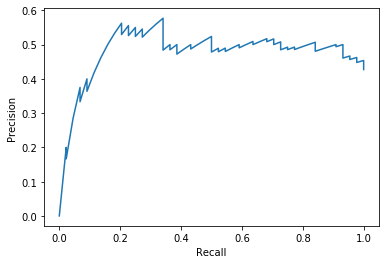

In [10]:
zz=zip(di["fs"],di["fb"])
iy=sorted(zz,reverse=True)
result=[]
for _,i in iy:
    result.append(i)
count_0=result.count(0)
rel1=len(result)-count_0
# print(rel1)
di1={"pre":[],"rec":[]}
fff=r=c=0
while(fff<len(result)):
    coun=0
    while(coun<1):
        if result[fff]!=0:
            r+=1
        c = c + 1
        coun+=1
    app(di1["pre"],r / c)
    app(di1["rec"],r / rel1)
    fff+=1

plt.plot(di1["rec"],di1["pre"])
plt.gca().set(xlabel='Recall', ylabel='Precision')
plt.show()